In [1]:
import pandas as pd
import datetime
import string
import numpy as np
#import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import itertools
%matplotlib inline
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Reading the data

In [2]:
df = pd.read_csv('berlin.csv')

In [3]:
# creating the date column
df['Date']=pd.to_datetime(df['t'], format="%Y%m%d")

In [4]:
df = df.rename(columns={"Luftemperatur_Avg": "Temp"})

In [5]:
df.describe()

,Row,Latitude,Longitude,t,Temp
count,25475.00000,2.547500e+04,2.547500e+04,2.547500e+04,25475.000000
mean,12738.00000,5.245780e+01,1.331010e+01,1.984442e+07,9.340389
std,7354.14339,1.421113e-14,3.552783e-15,2.013455e+05,7.646061
min,1.00000,5.245780e+01,1.331010e+01,1.950010e+07,-17.900000
25%,6369.50000,5.245780e+01,1.331010e+01,1.967061e+07,3.500000
50%,12738.00000,5.245780e+01,1.331010e+01,1.984112e+07,9.500000
75%,19106.50000,5.245780e+01,1.331010e+01,2.002042e+07,15.400000
max,25475.00000,5.245780e+01,1.331010e+01,2.019093e+07,29.500000


In [6]:
# Using graph_objects
#import plotly.graph_objects as go

#fig = go.Figure([go.Scatter(x=df['Date'], y=df['Temp'])])
#fig.show()

## Indexing with timeseries

In [7]:
# set the date as the index
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04',
               '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08',
               '1950-01-09', '1950-01-10',
               ...
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=25475, freq=None)

In [8]:
#resample with month start
y = df['Temp'].resample('MS').mean()

In [9]:
y['2018':]

Date
2018-01-01     3.470968
2018-02-01    -0.946429
2018-03-01     1.700000
2018-04-01    13.373333
2018-05-01    17.609677
2018-06-01    19.016667
2018-07-01    21.141935
2018-08-01    20.967742
2018-09-01    16.100000
2018-10-01    10.738710
2018-11-01     5.296667
2018-12-01     4.467742
2019-01-01     1.406452
2019-02-01     4.425000
2019-03-01     6.945161
2019-04-01    11.080000
2019-05-01    12.564516
2019-06-01    21.893333
2019-07-01    19.377419
2019-08-01    20.251613
2019-09-01    14.526667
Freq: MS, Name: Temp, dtype: float64

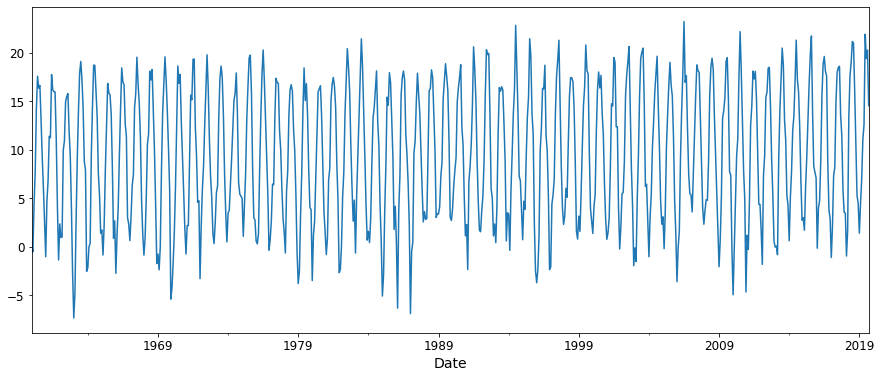

In [10]:
y['1960':].plot(figsize=(15, 6))
plt.show()

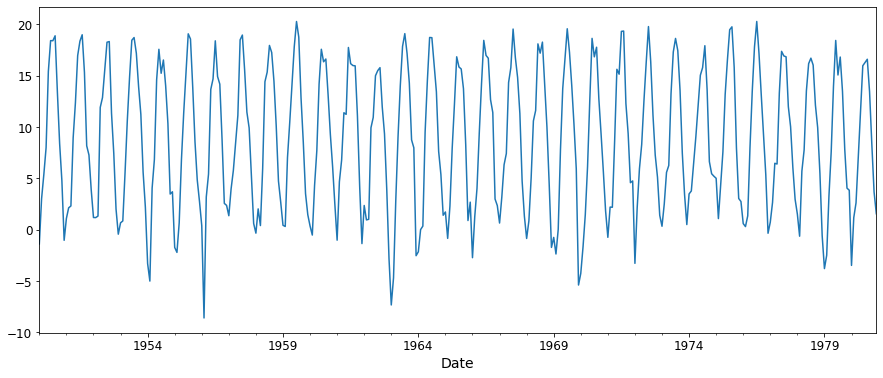

In [11]:
y[:'1980'].plot(figsize=(15, 6))
plt.show()

Besides the yearly seaosonality we can also notice how the min and max temperatures have gone up.

Let's use time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

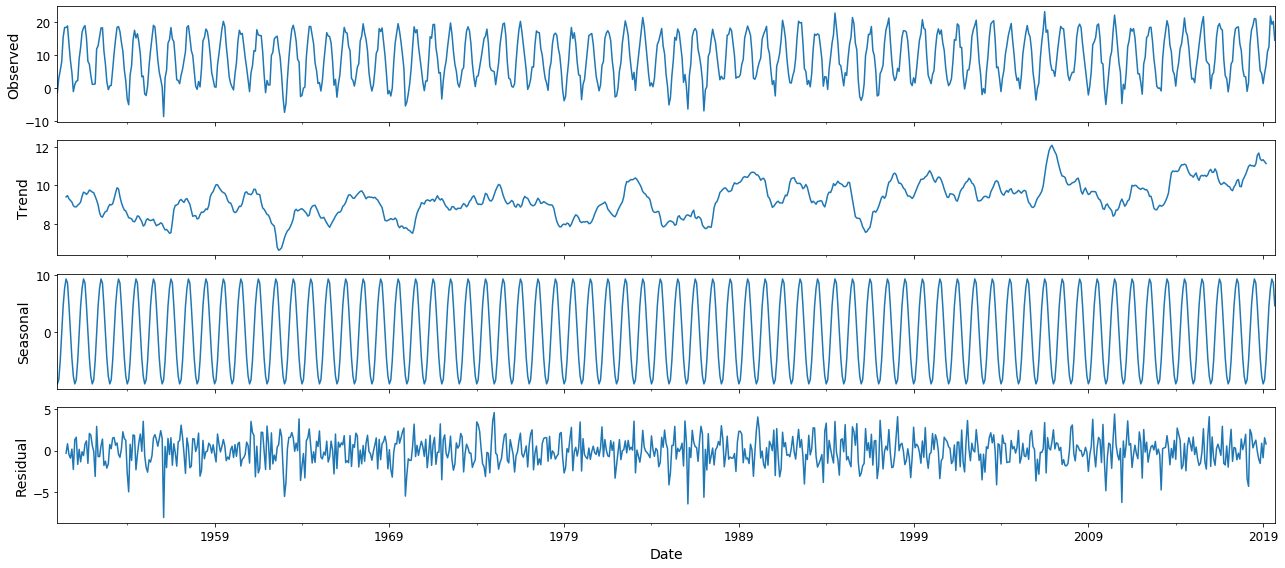

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='aditive')
fig = decomposition.plot()
plt.show()

As expected temperature is seasonal in northern Europe, and there is slight upwards trend. 

## Forcasting with Arima

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6467.465513808912
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5558.580686673624
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3941.1912023299456
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3420.883024212552
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3938.2343457739526
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3463.882690405665
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3694.1778729628777
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3422.8828162705704
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5596.624199119736
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5049.221717359103
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3917.6264264193583
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3379.0457133847235
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3915.5005678224693
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3423.756722271891
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3668.24840240886
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3381.0456454672385
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4746.984963873968
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4434.72422517698
ARIM

Optimal value ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3359.692453043943

## Fitting the ARIMA model

In [19]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2077      0.032      6.470      0.000       0.145       0.271
ma.L1         -1.0104      0.010   -106.305      0.000      -1.029      -0.992
ar.S.L12       0.0005      0.001      0.475      0.635      -0.001       0.002
ma.S.L12      -1.0002      2.386     -0.419      0.675      -5.677       3.677
sigma2         3.3729      8.062      0.418      0.676     -12.429      19.175


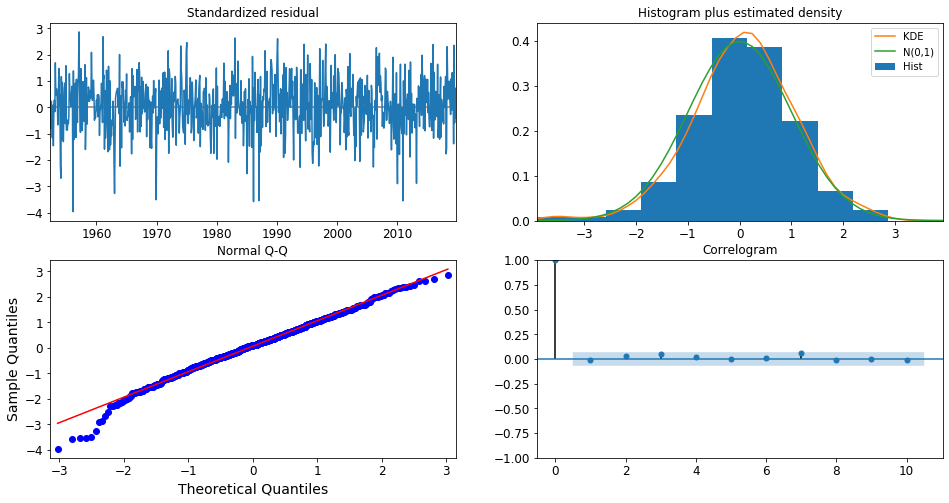

In [20]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

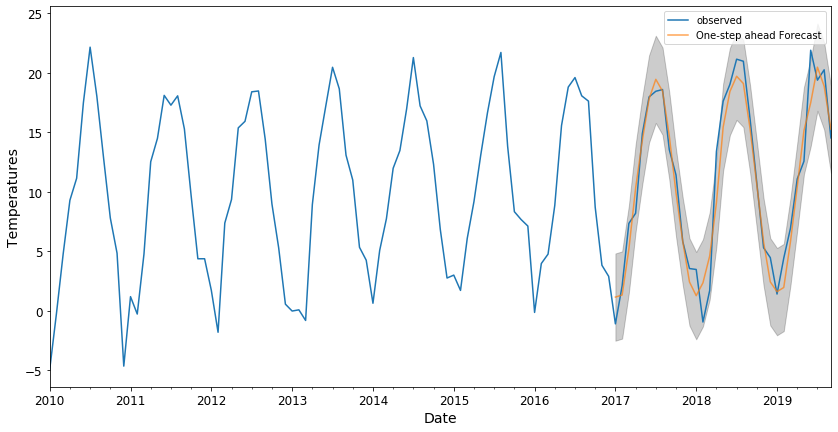

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temperatures')
plt.legend()
plt.show()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3.55


In [23]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.88


## Producing and visualizing forecasts

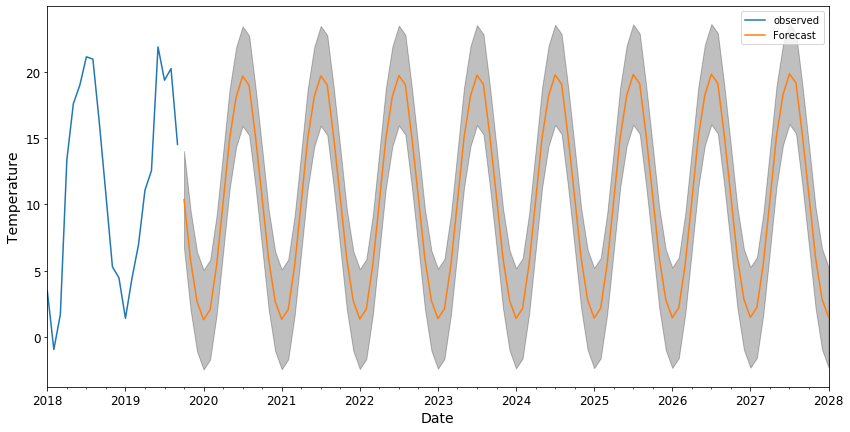

In [24]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y['2018':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

In [25]:
from fbprophet import Prophet


temperature = df.rename(columns={'Temp': 'y'})
temperature['ds'] = temperature.index
temperature_model = Prophet(interval_width=0.95)
temperature_model.fit(temperature)

temperature_forecast = temperature_model.make_future_dataframe(periods=36, freq='MS')
temperature_forecast = temperature_model.predict(temperature_forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

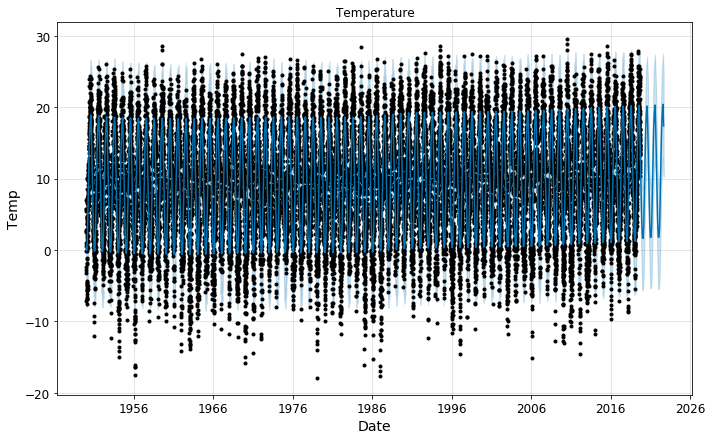

In [26]:
plt.figure(figsize=(18, 6))
temperature_model.plot(temperature_forecast, xlabel = 'Date', ylabel = 'Temp')
plt.title('Temperature');

In [27]:
forecast = temperature_forecast.rename(columns={'ds': 'Date'})
forecast.head()

,Date,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-01-01,9.234220,-6.690393,7.362276,9.234220,9.234220,-8.820045,-8.820045,-8.820045,0.016630,0.016630,0.016630,-8.836676,-8.836676,-8.836676,0.0,0.0,0.0,0.414175
1,1950-01-02,9.233984,-7.008110,7.709652,9.233984,9.233984,-8.843960,-8.843960,-8.843960,0.049454,0.049454,0.049454,-8.893414,-8.893414,-8.893414,0.0,0.0,0.0,0.390024
2,1950-01-03,9.233748,-6.895214,7.569381,9.233748,9.233748,-8.925502,-8.925502,-8.925502,0.020878,0.020878,0.020878,-8.946380,-8.946380,-8.946380,0.0,0.0,0.0,0.308247
3,1950-01-04,9.233512,-6.707649,7.275026,9.233512,9.233512,-8.982751,-8.982751,-8.982751,0.012482,0.012482,0.012482,-8.995232,-8.995232,-8.995232,0.0,0.0,0.0,0.250762
4,1950-01-05,9.233276,-7.325940,7.576615,9.233276,9.233276,-9.061340,-9.061340,-9.061340,-0.021662,-0.021662,-0.021662,-9.039678,-9.039678,-9.039678,0.0,0.0,0.0,0.171936


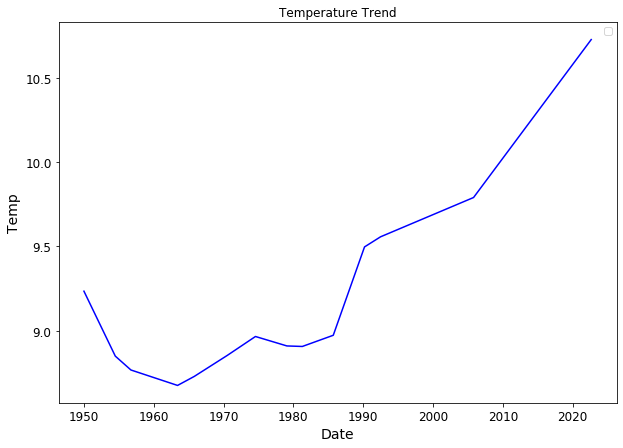

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Temp')
plt.title('Temperature Trend');

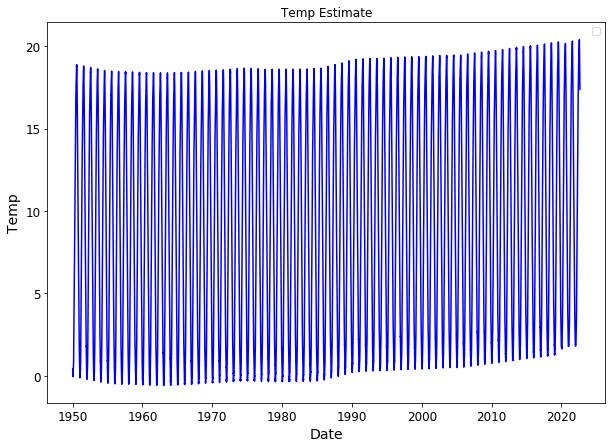

In [29]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Temp')
plt.title('Temp Estimate');

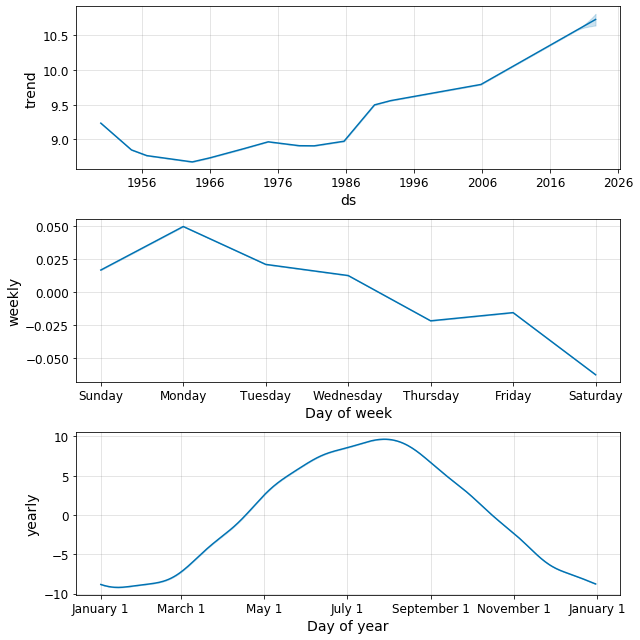

In [30]:
temperature_model.plot_components(temperature_forecast);